In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportion_confint
import statsmodels.api as sm

file_path = '/Users/rakibul/Desktop/uni koblenz/winter 202324/Research Lab/code/models/trainn.csv'
dataset = pd.read_csv(file_path)

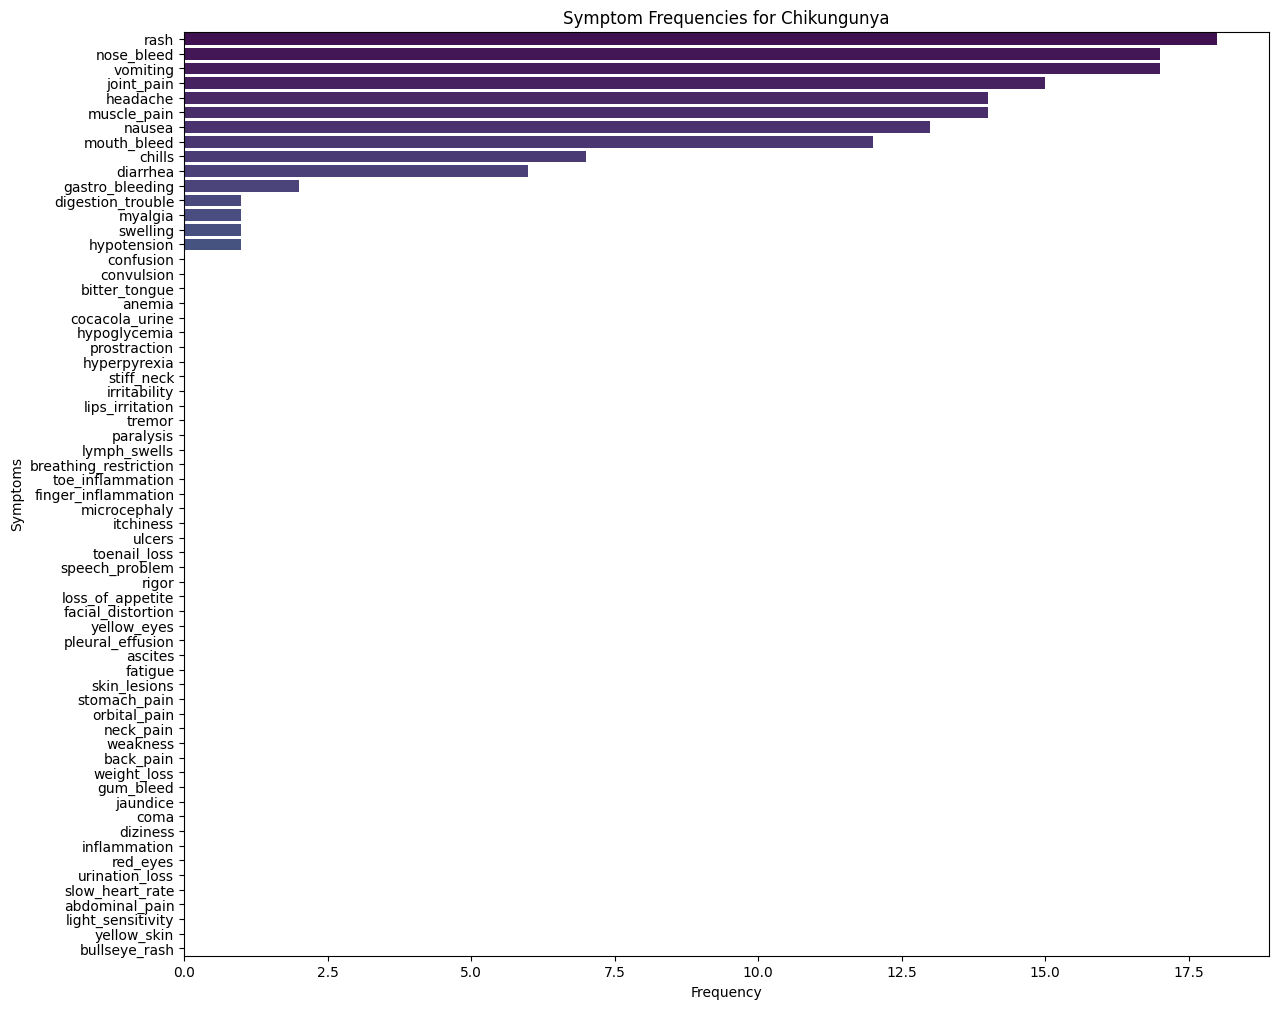

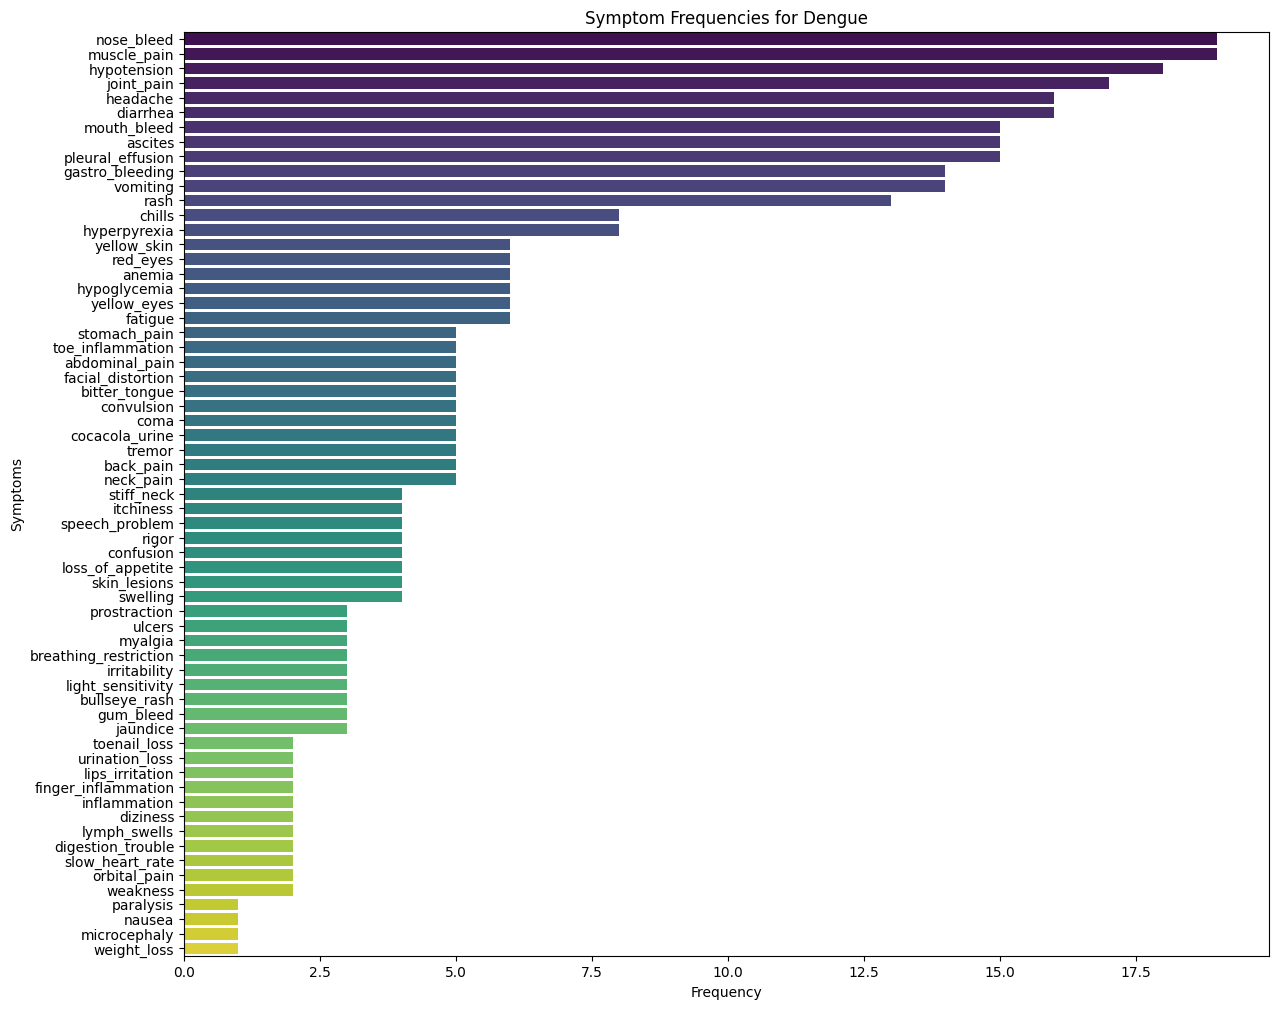

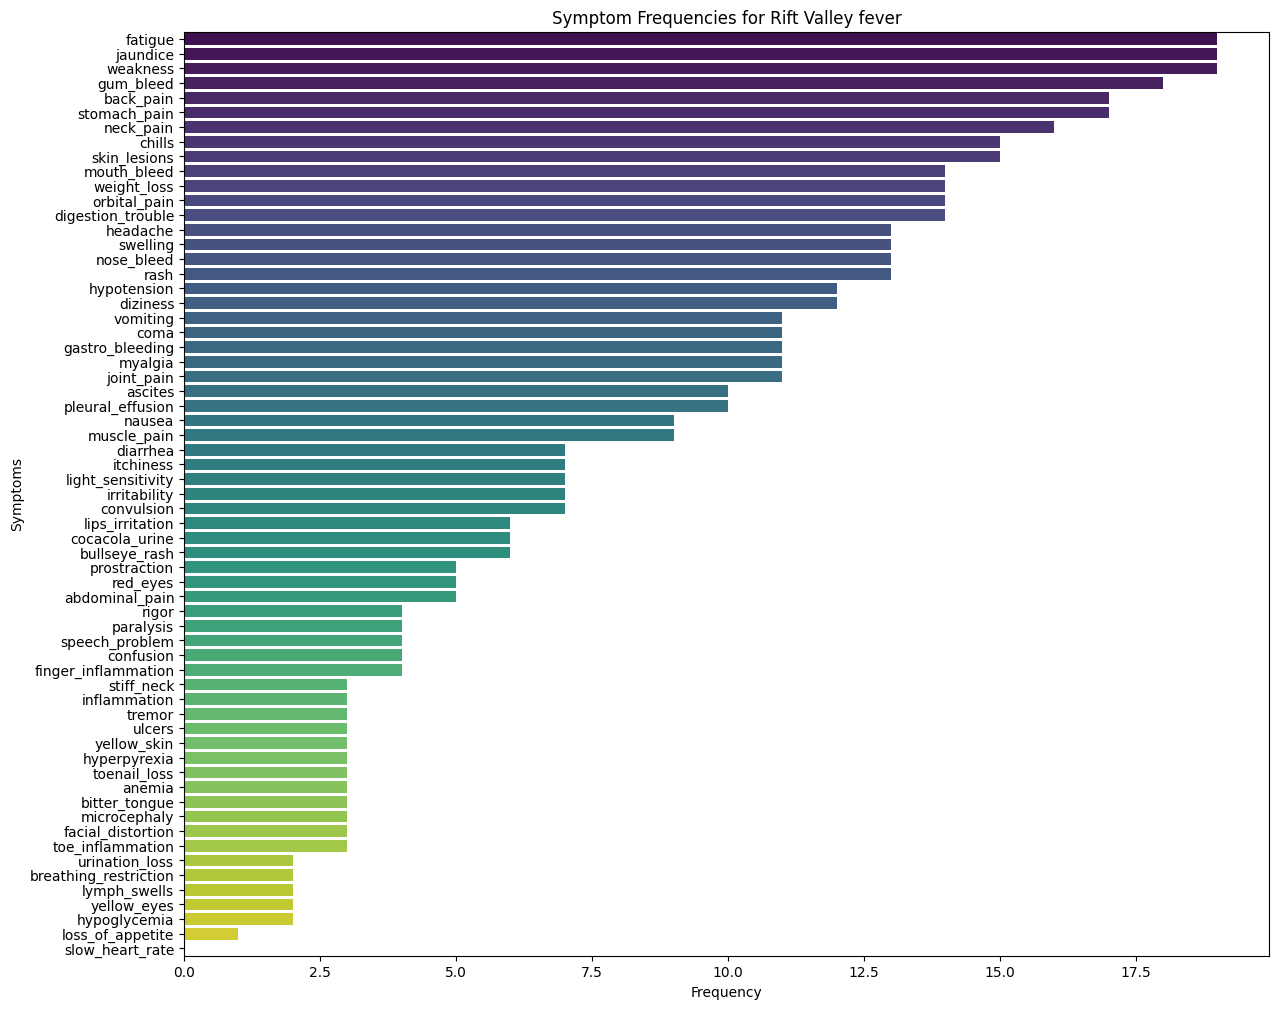

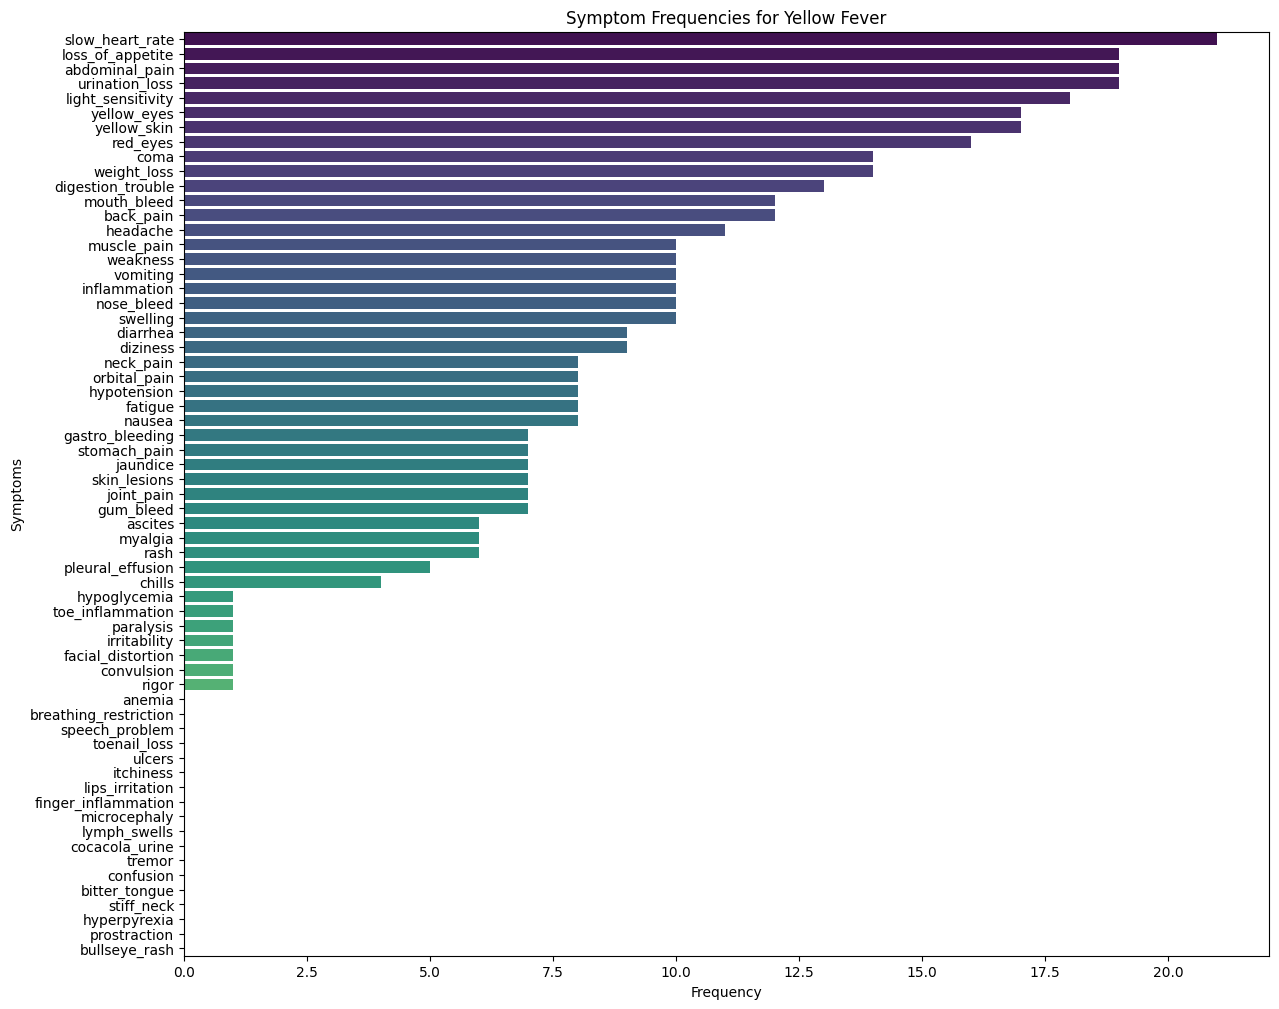

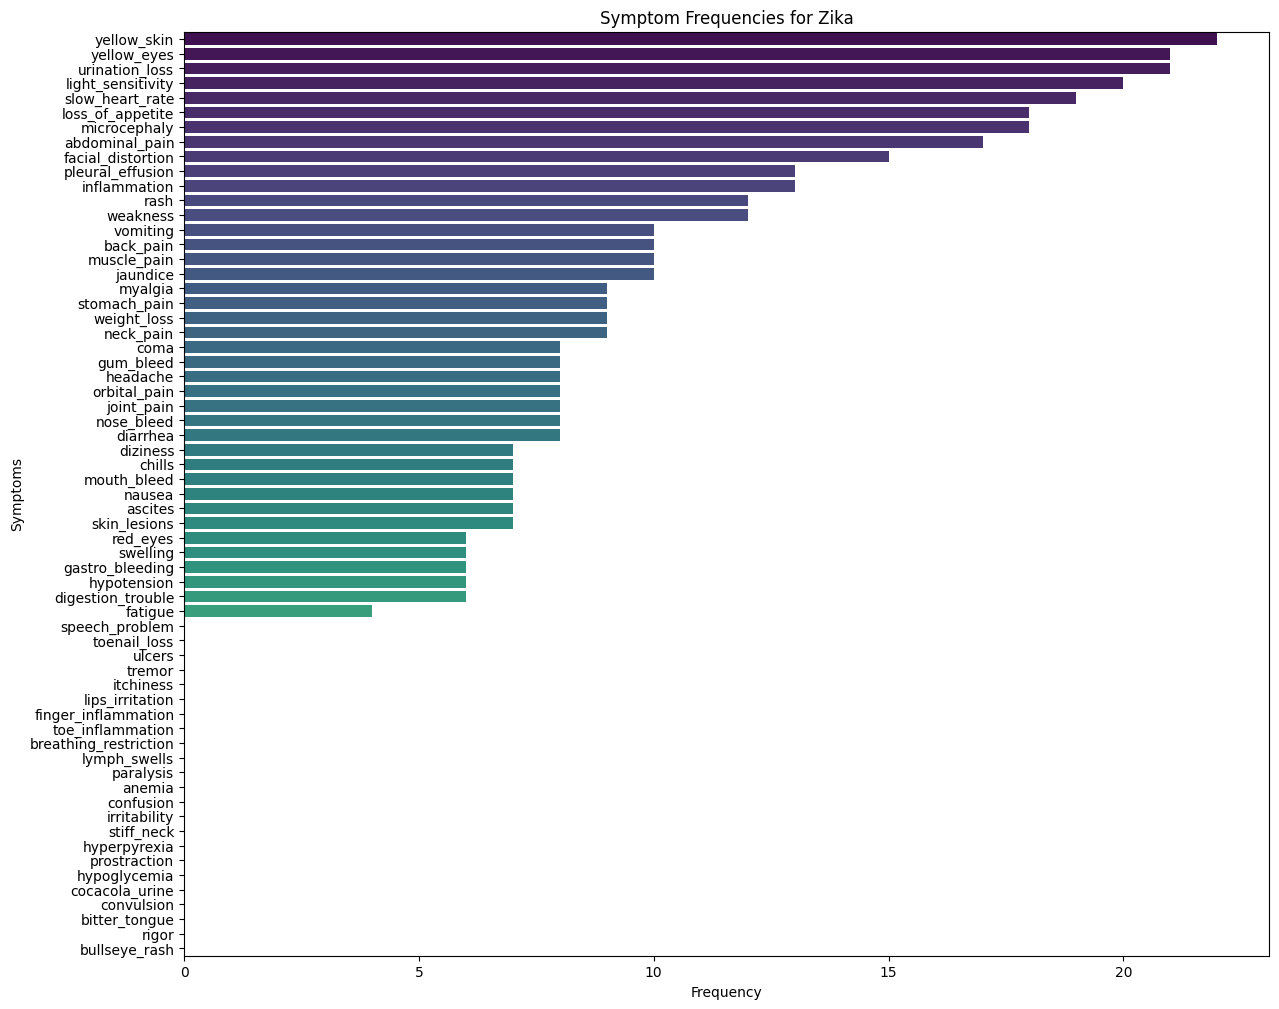

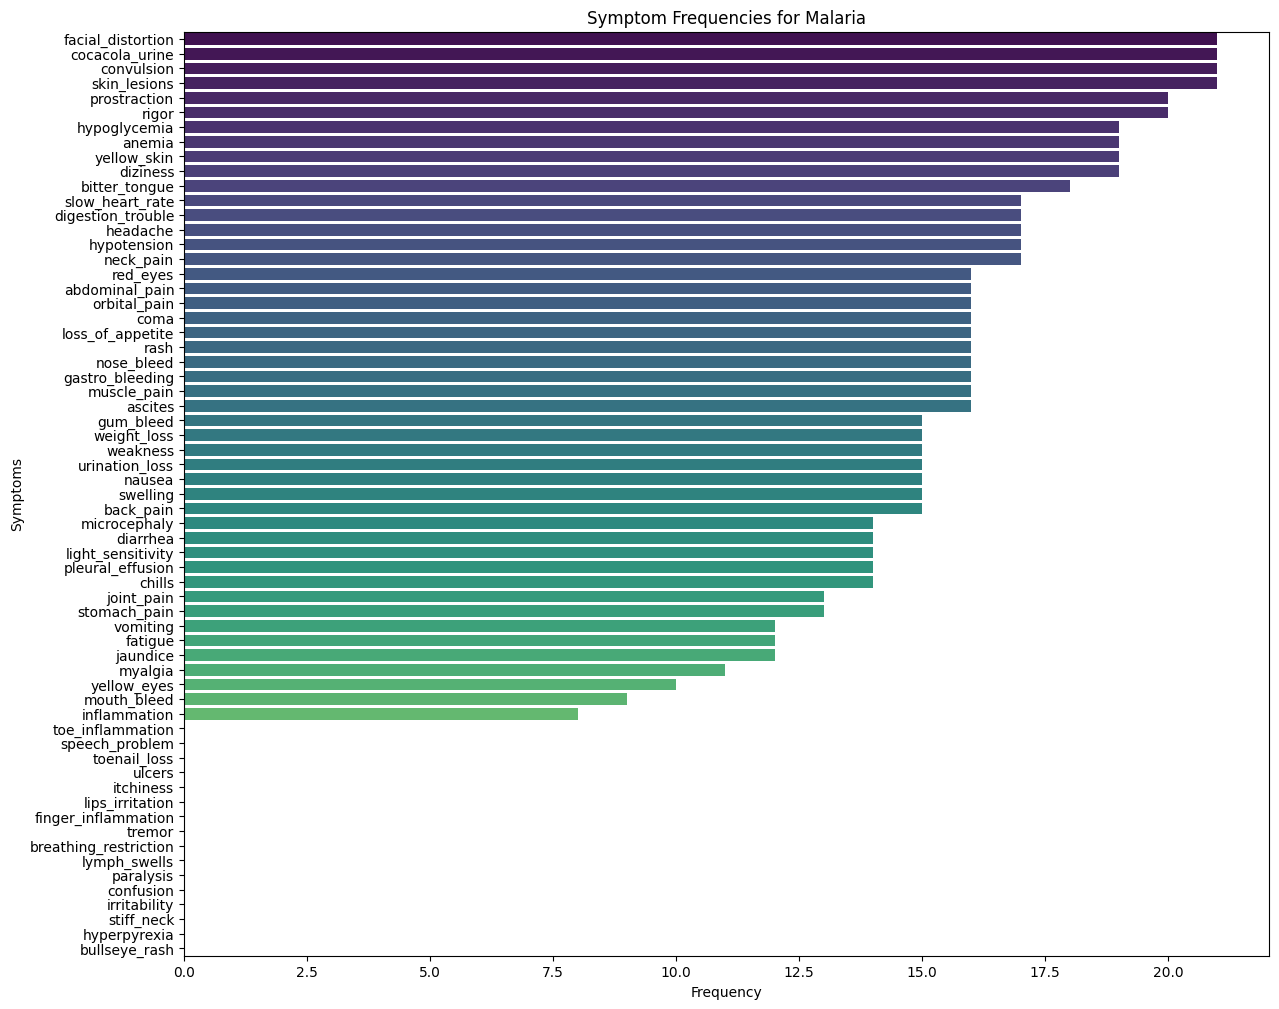

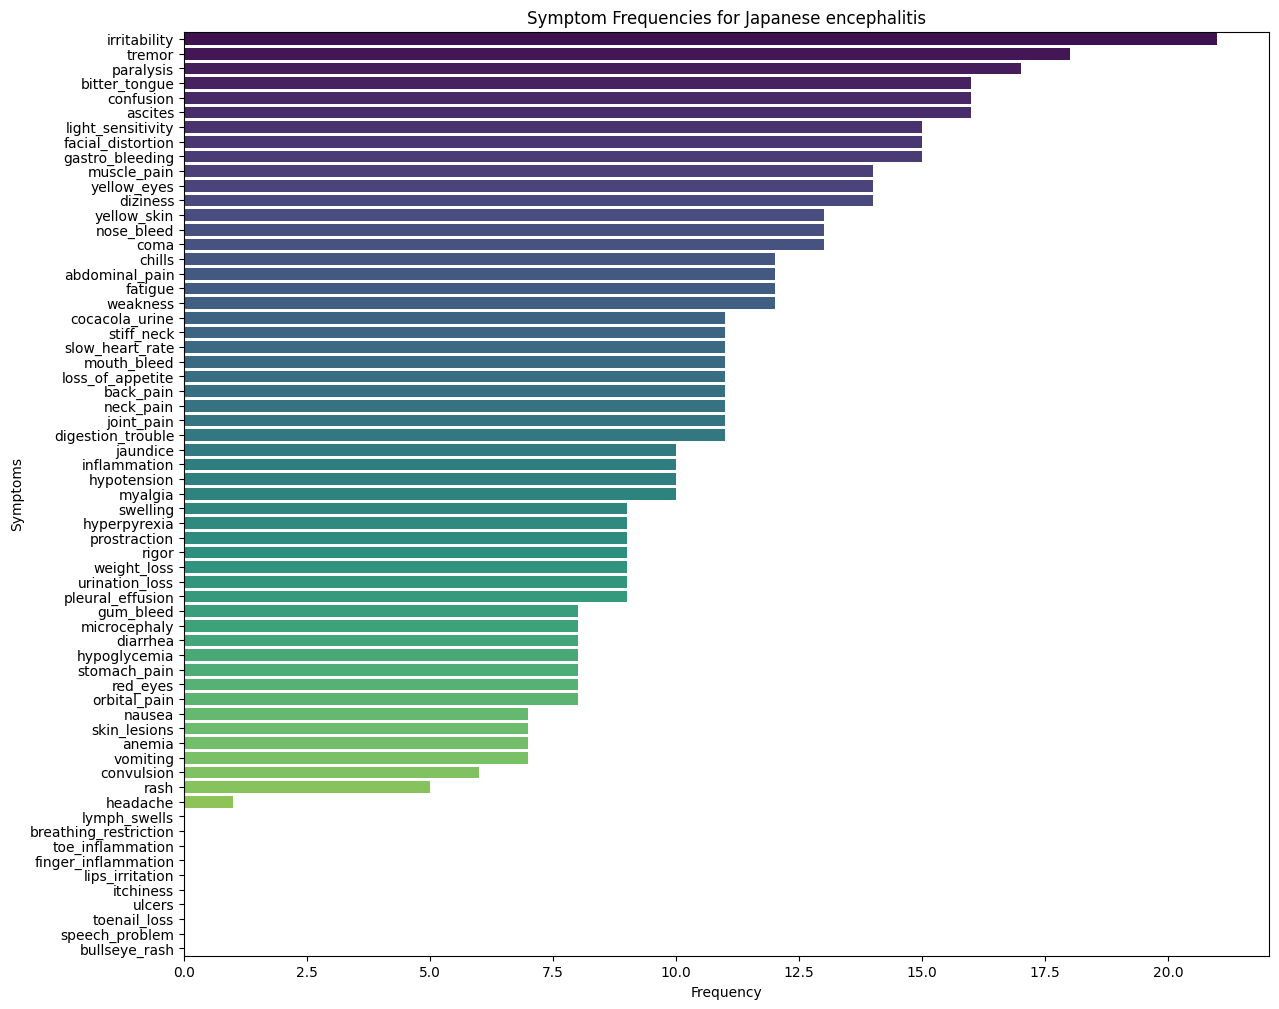

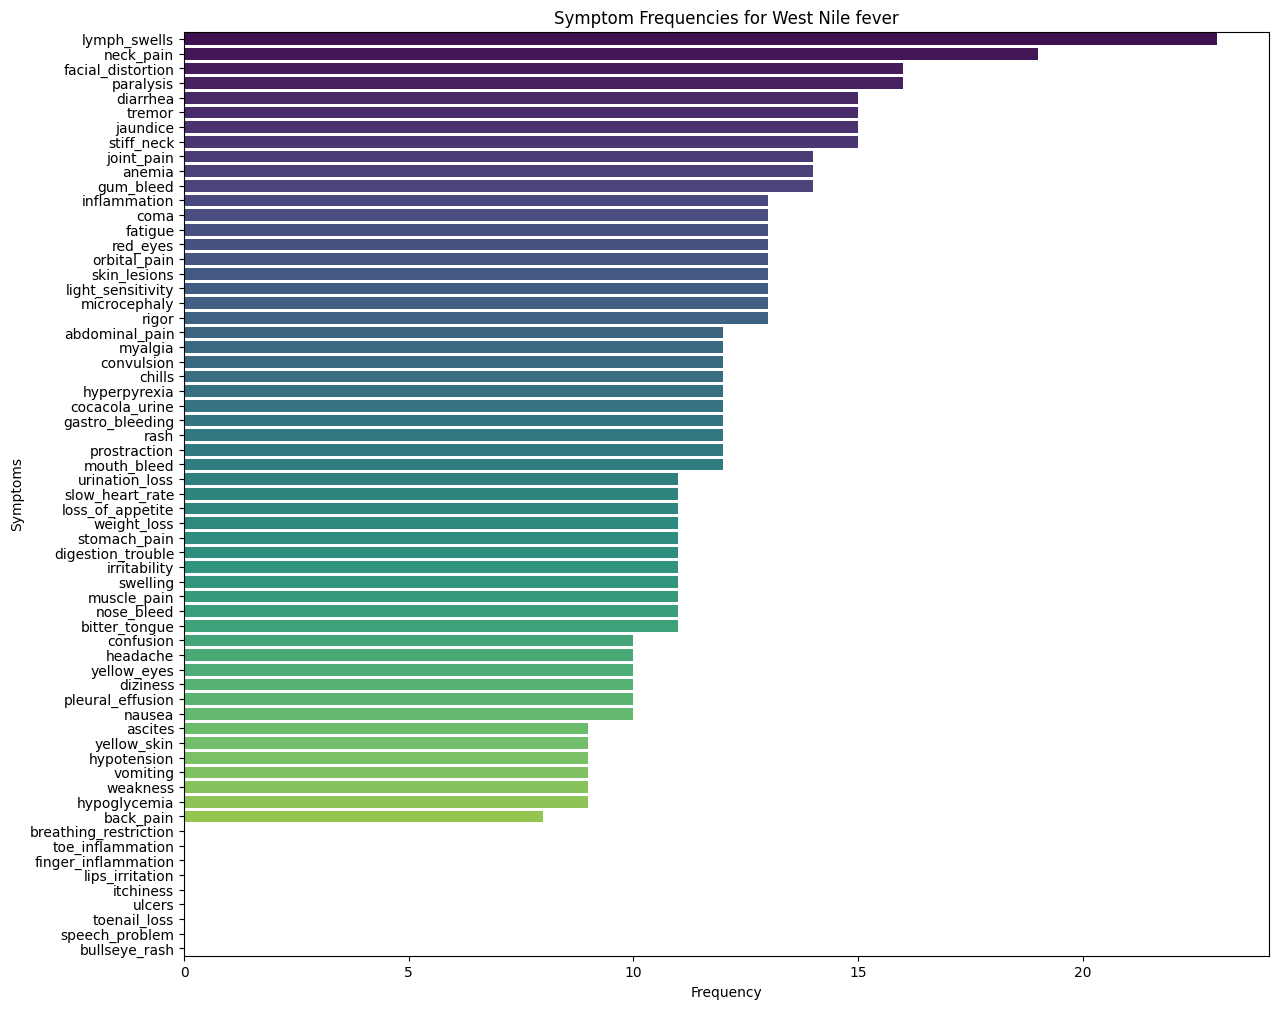

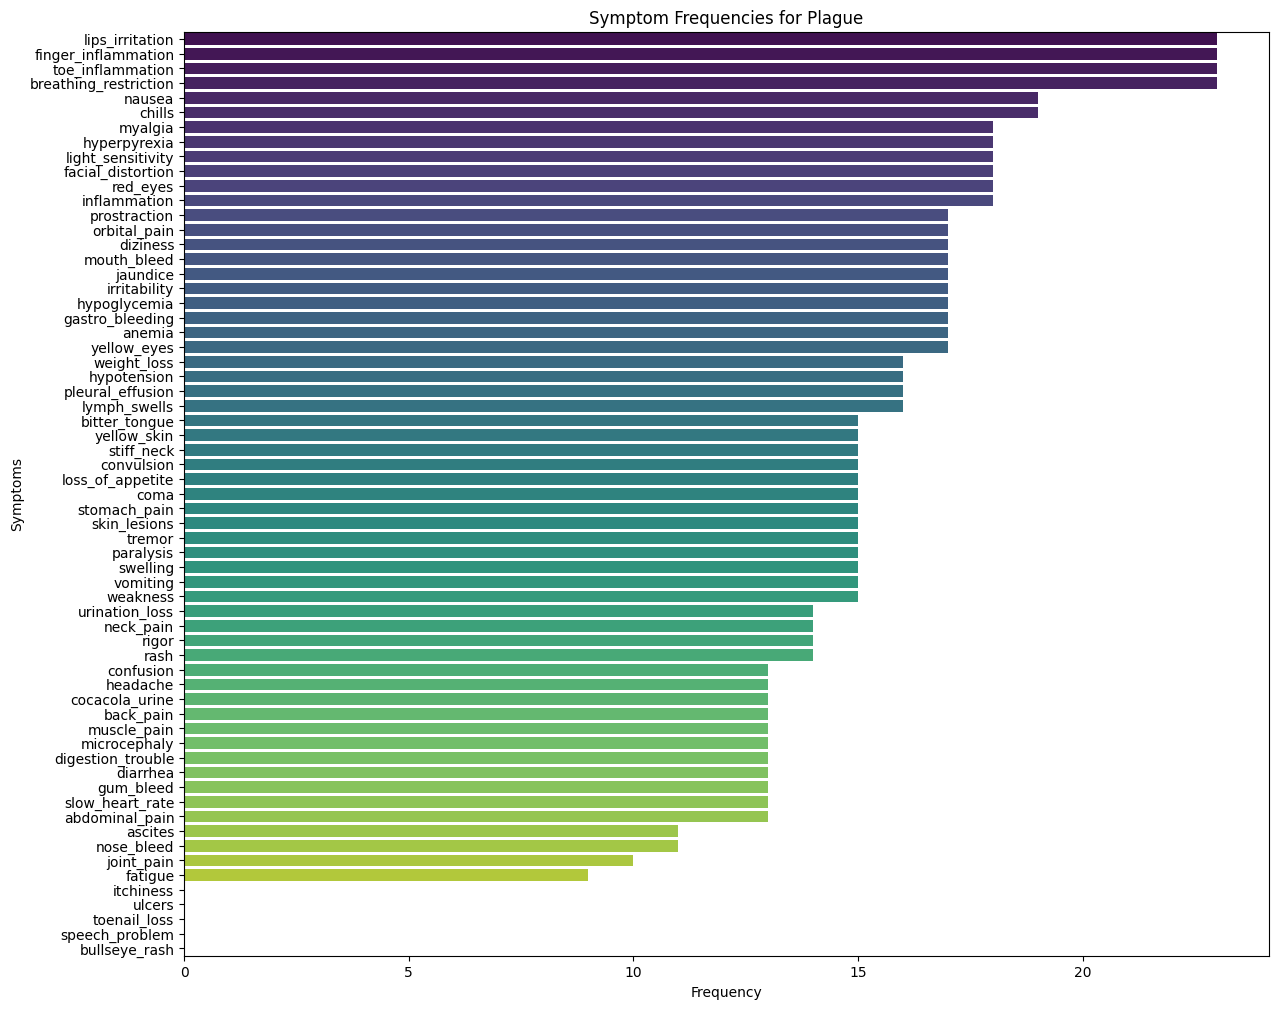

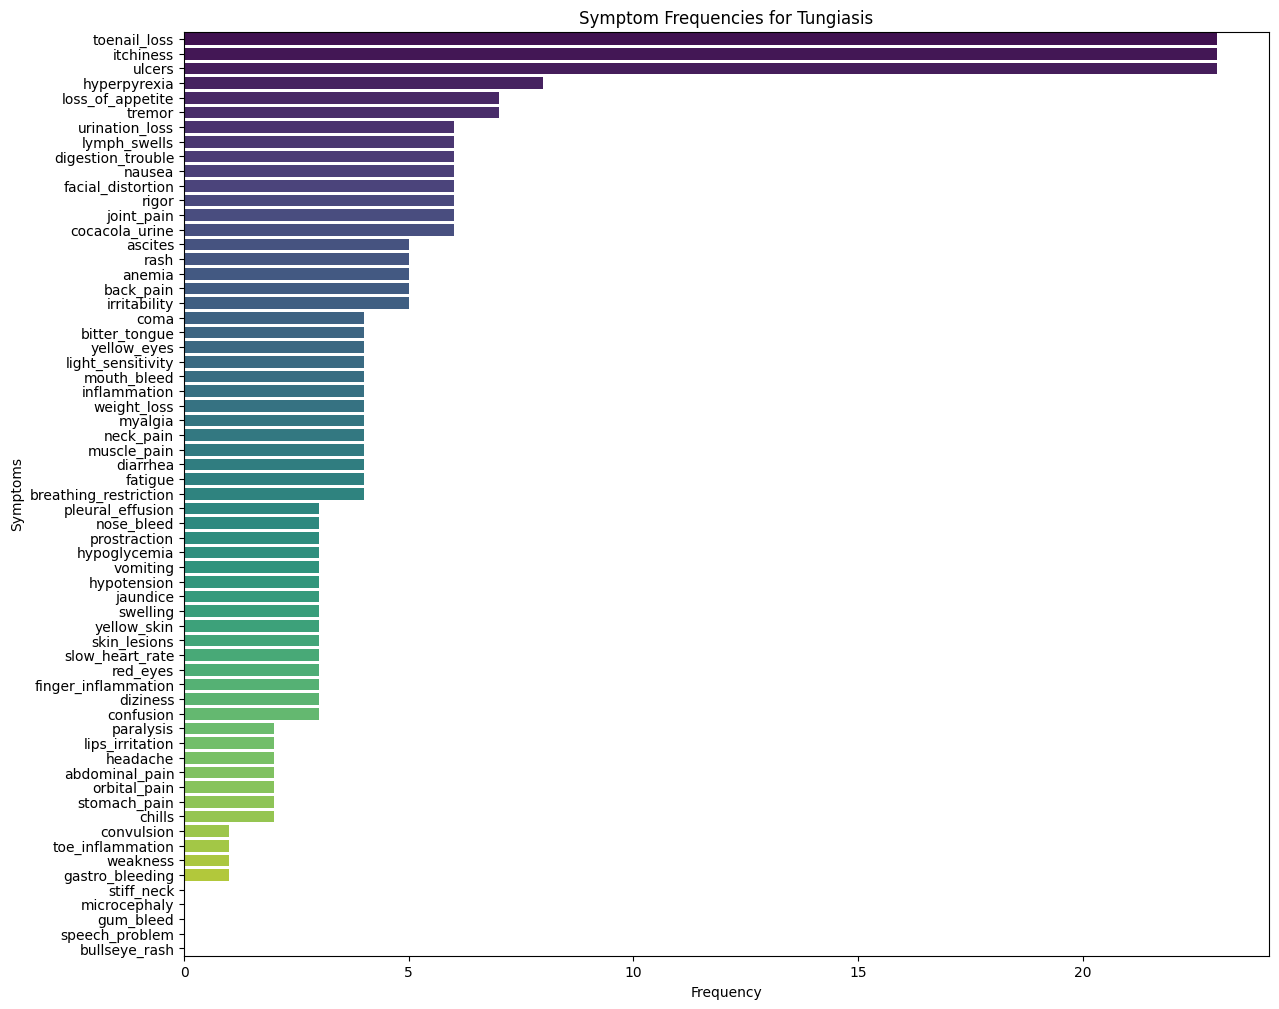

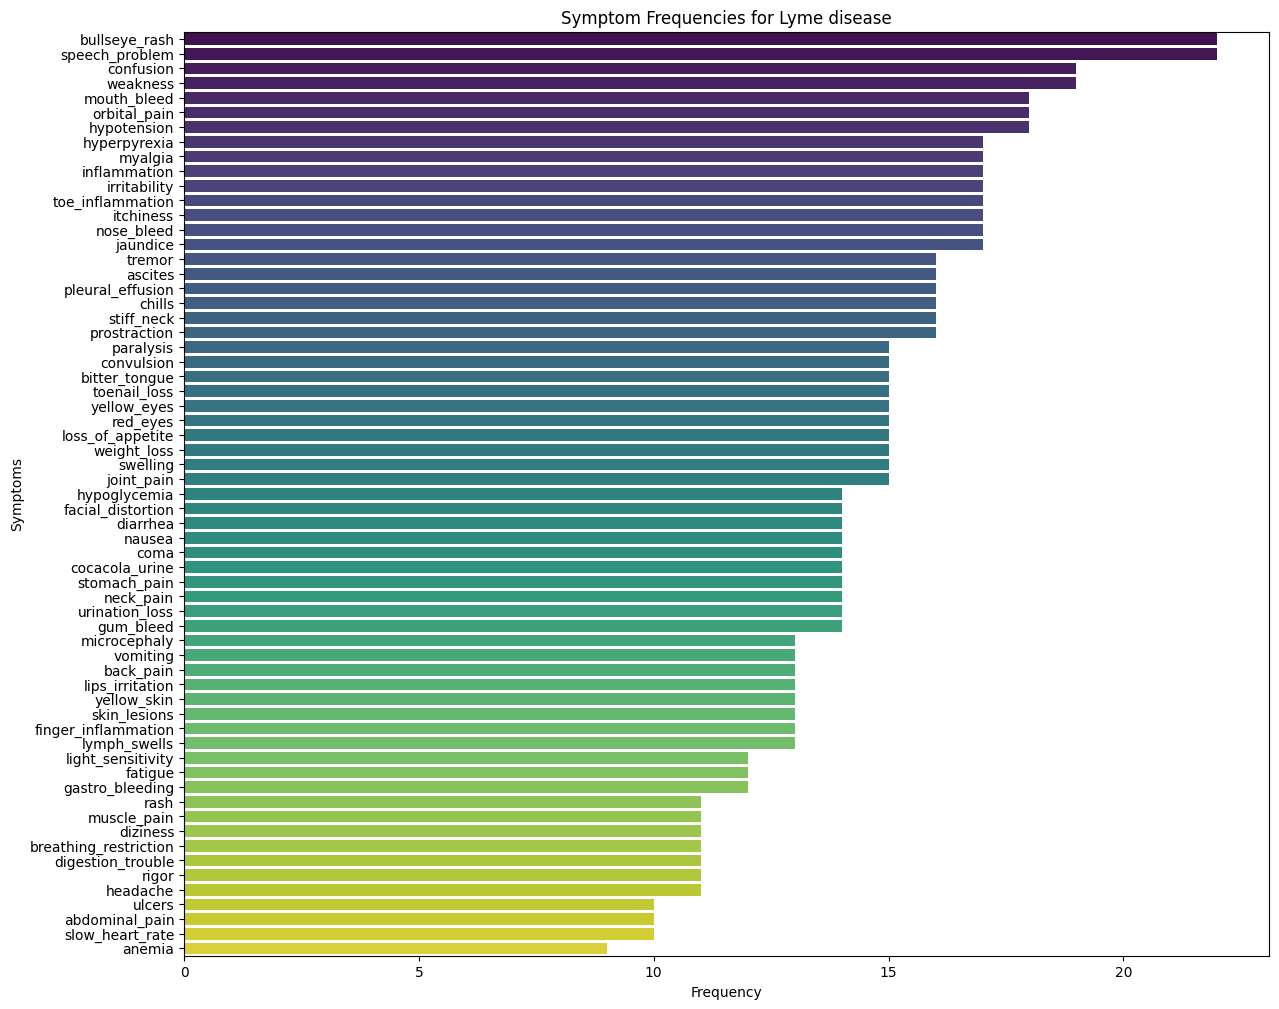

In [2]:
# Unique prognoses
unique_prognoses = dataset['prognosis'].unique()

# Symptoms columns
symptom_columns = dataset.columns[1:-1]  # Exclude 'id' and 'prognosis' columns

# Loop through each prognosis
for prognosis in unique_prognoses:
    prognosis_data = dataset[dataset['prognosis'] == prognosis]
    
    # Calculate symptom frequencies
    symptom_frequencies = prognosis_data[symptom_columns].sum().sort_values(ascending=False)
    
    # Plot symptom frequencies
    plt.figure(figsize=(14, 12))
    sns.barplot(x=symptom_frequencies.values, y=symptom_frequencies.index, palette="viridis")
    plt.title(f'Symptom Frequencies for {prognosis}')
    plt.xlabel('Frequency')
    plt.ylabel('Symptoms')
    plt.show()

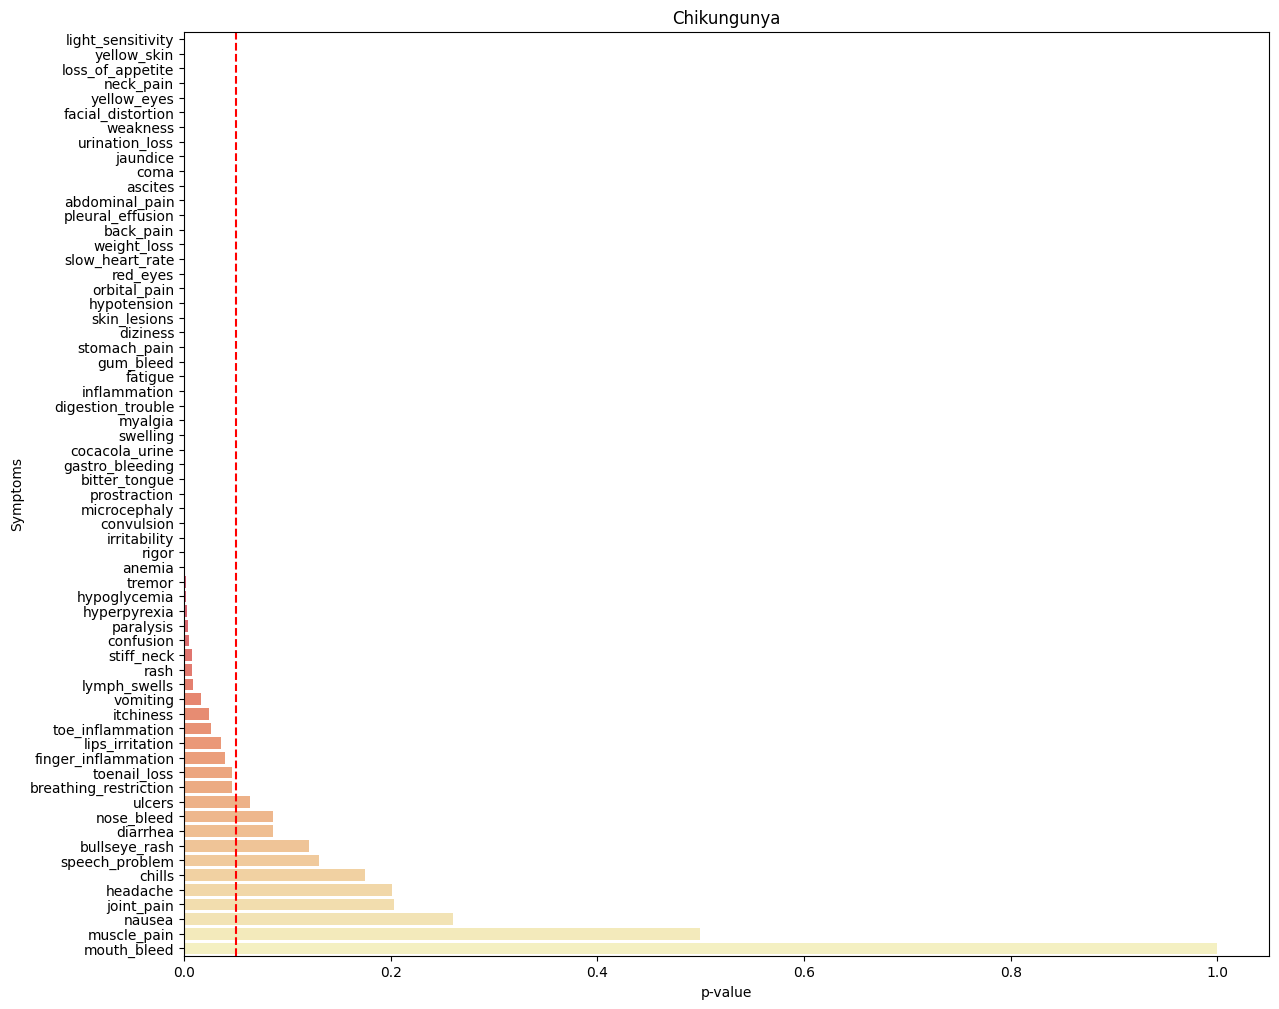

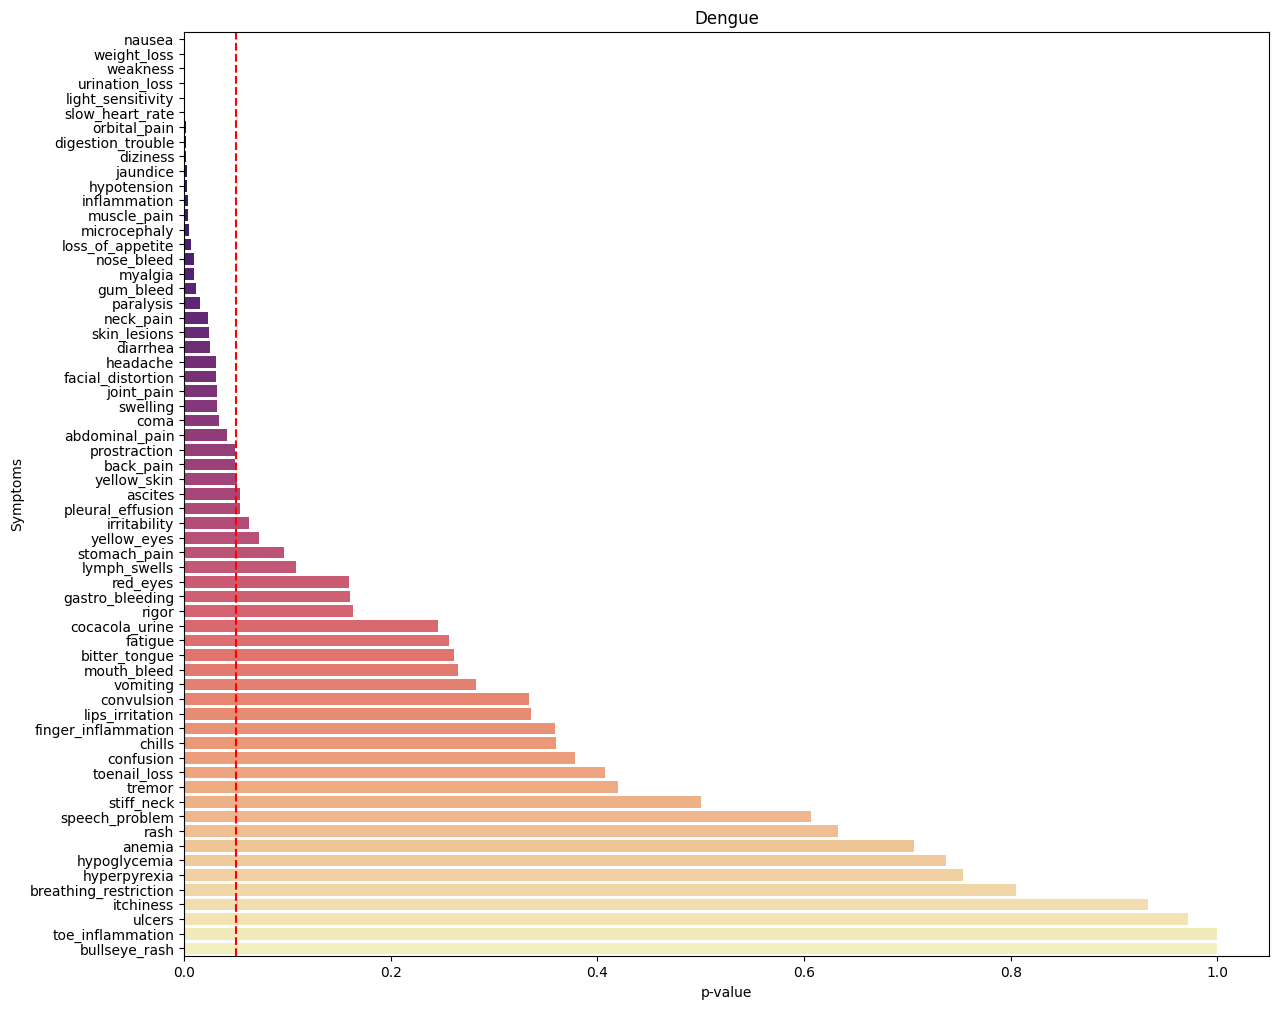

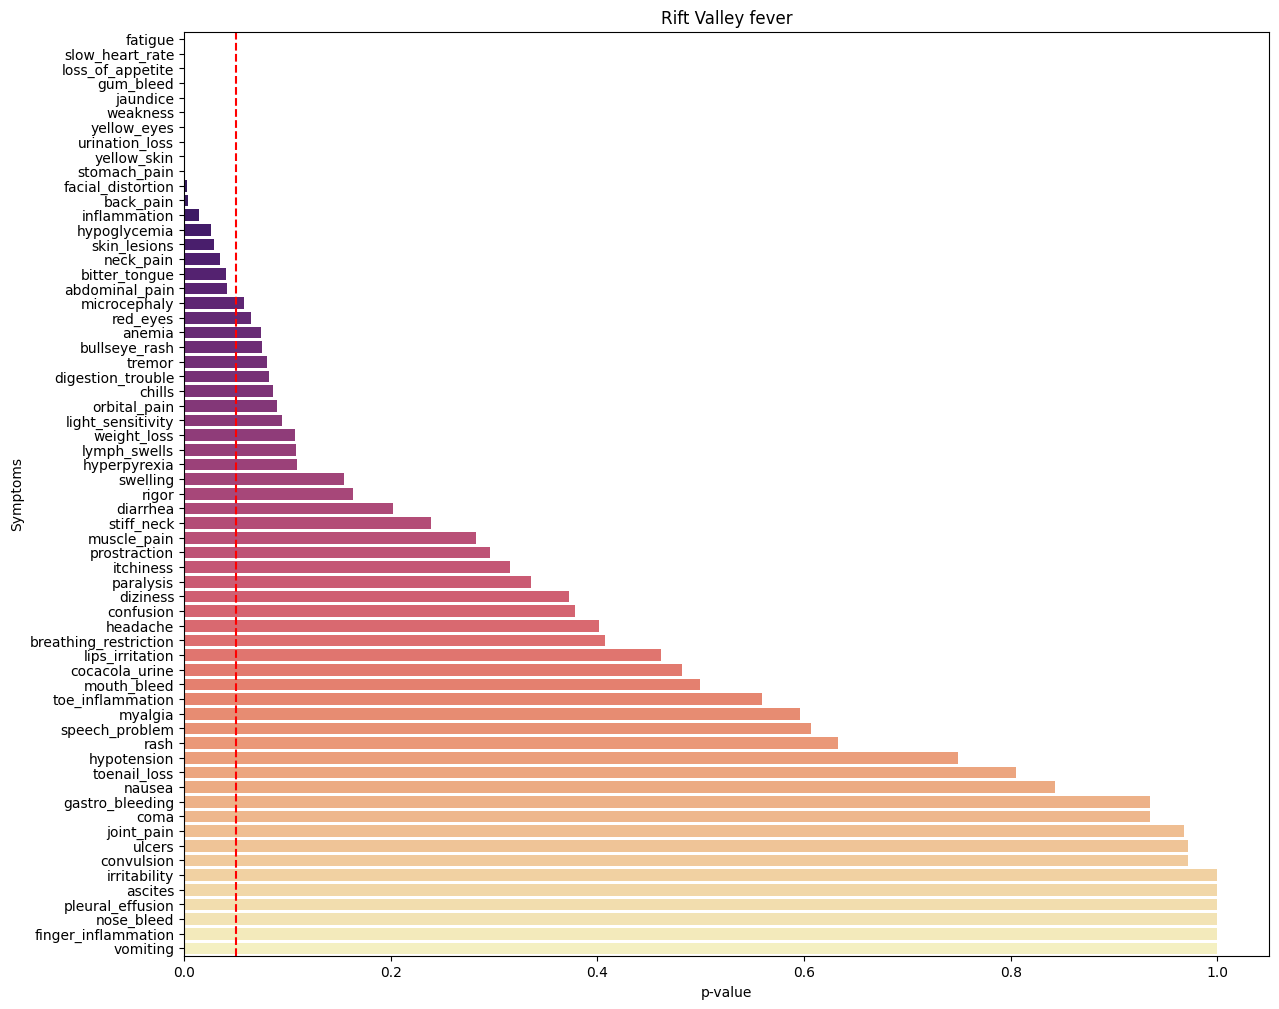

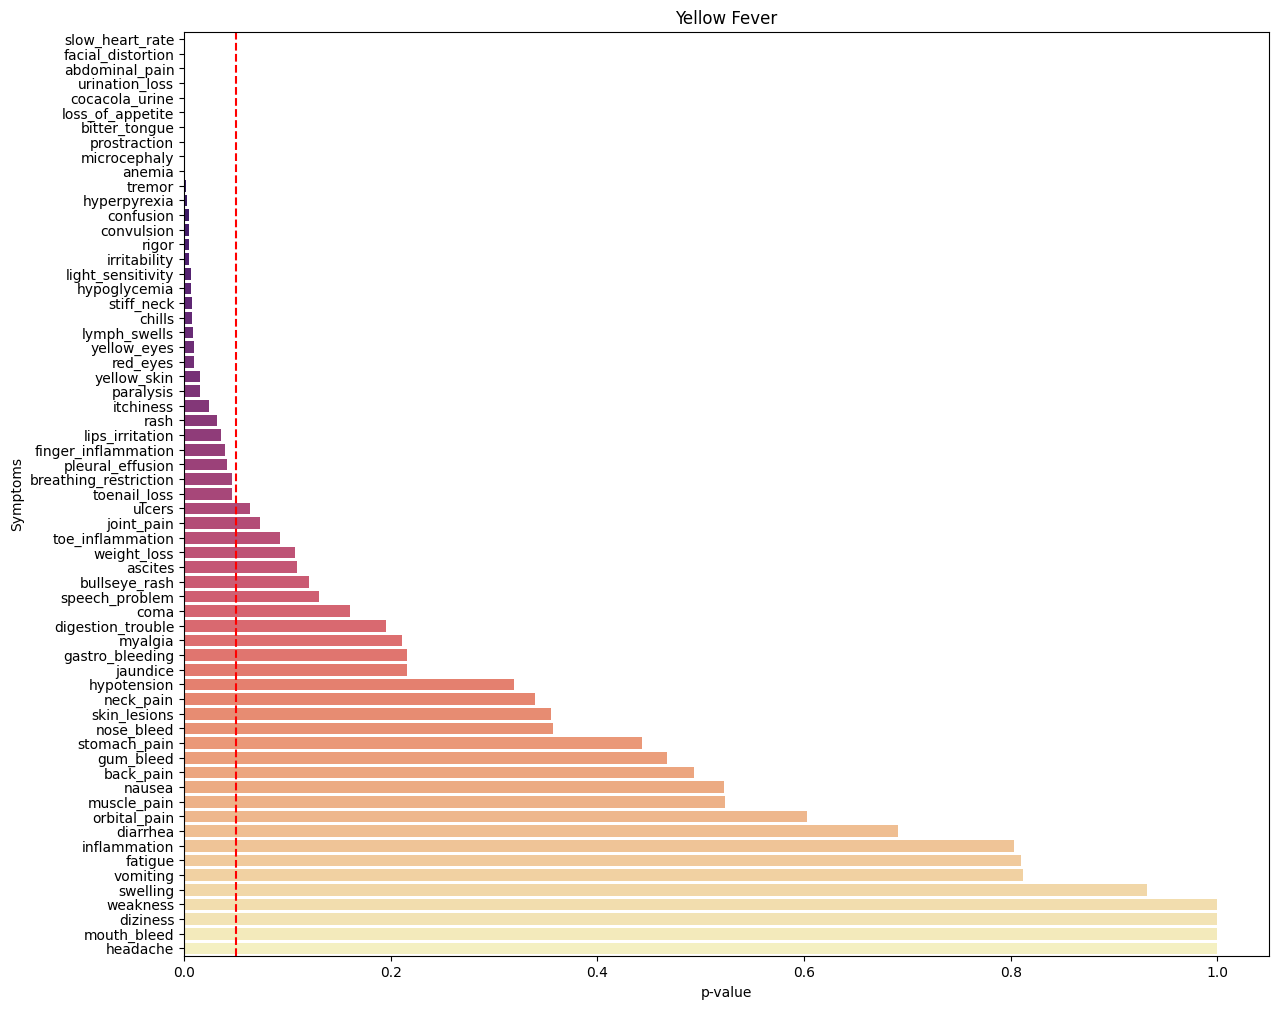

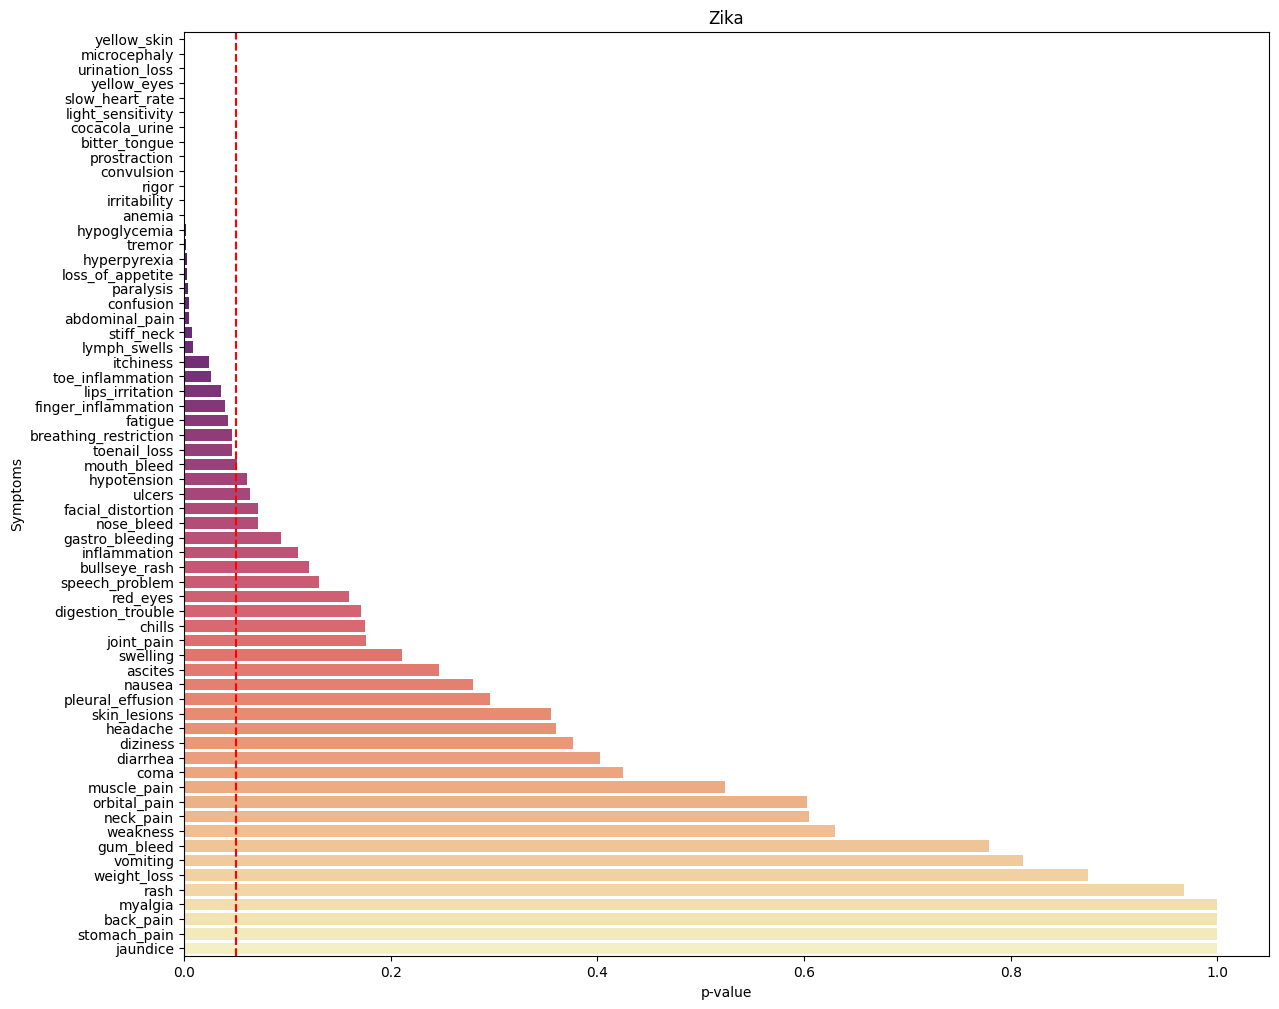

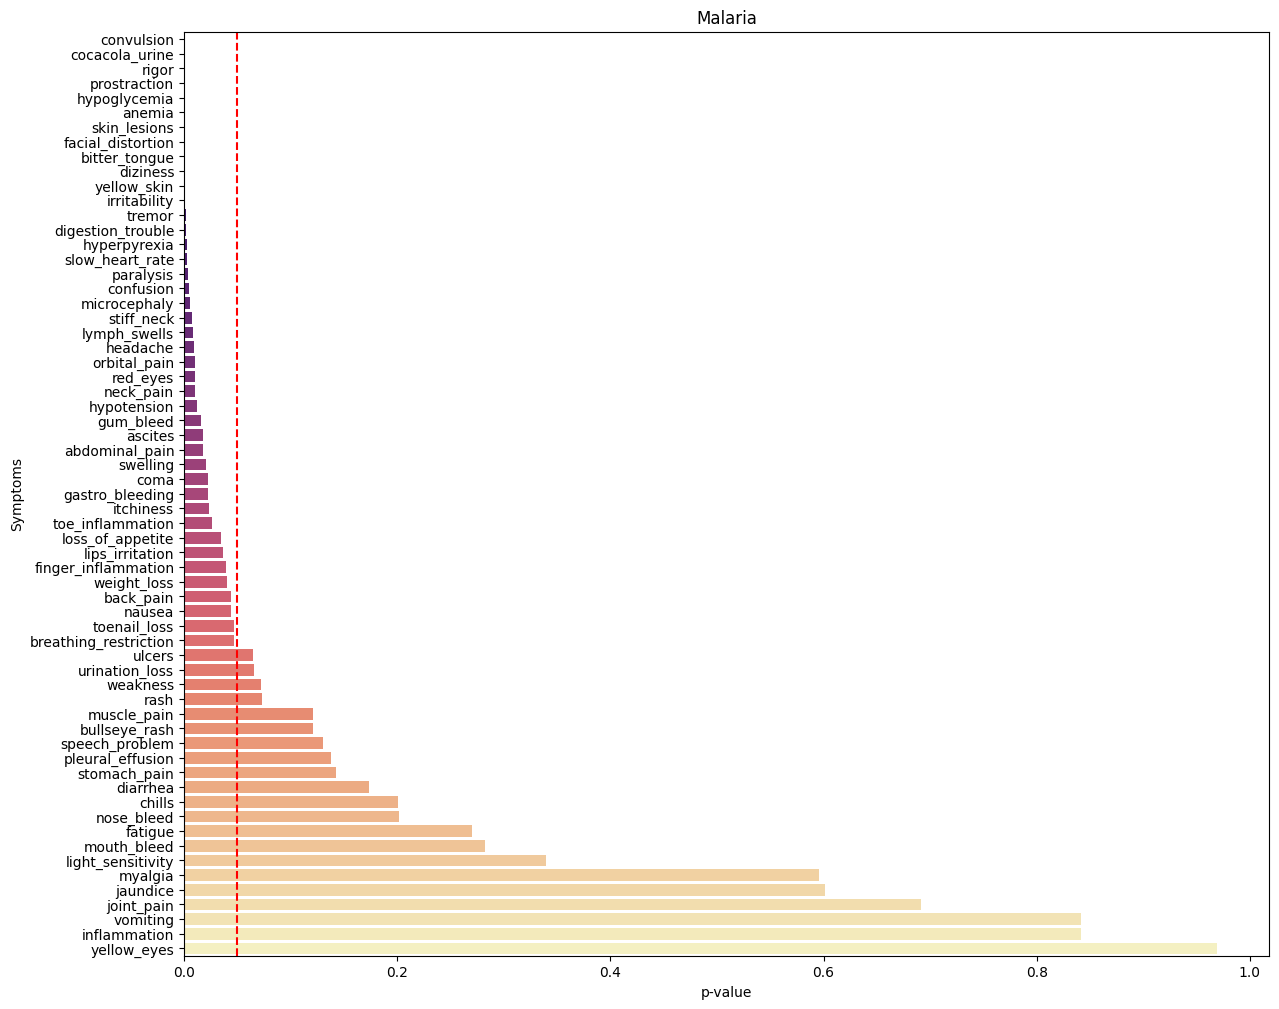

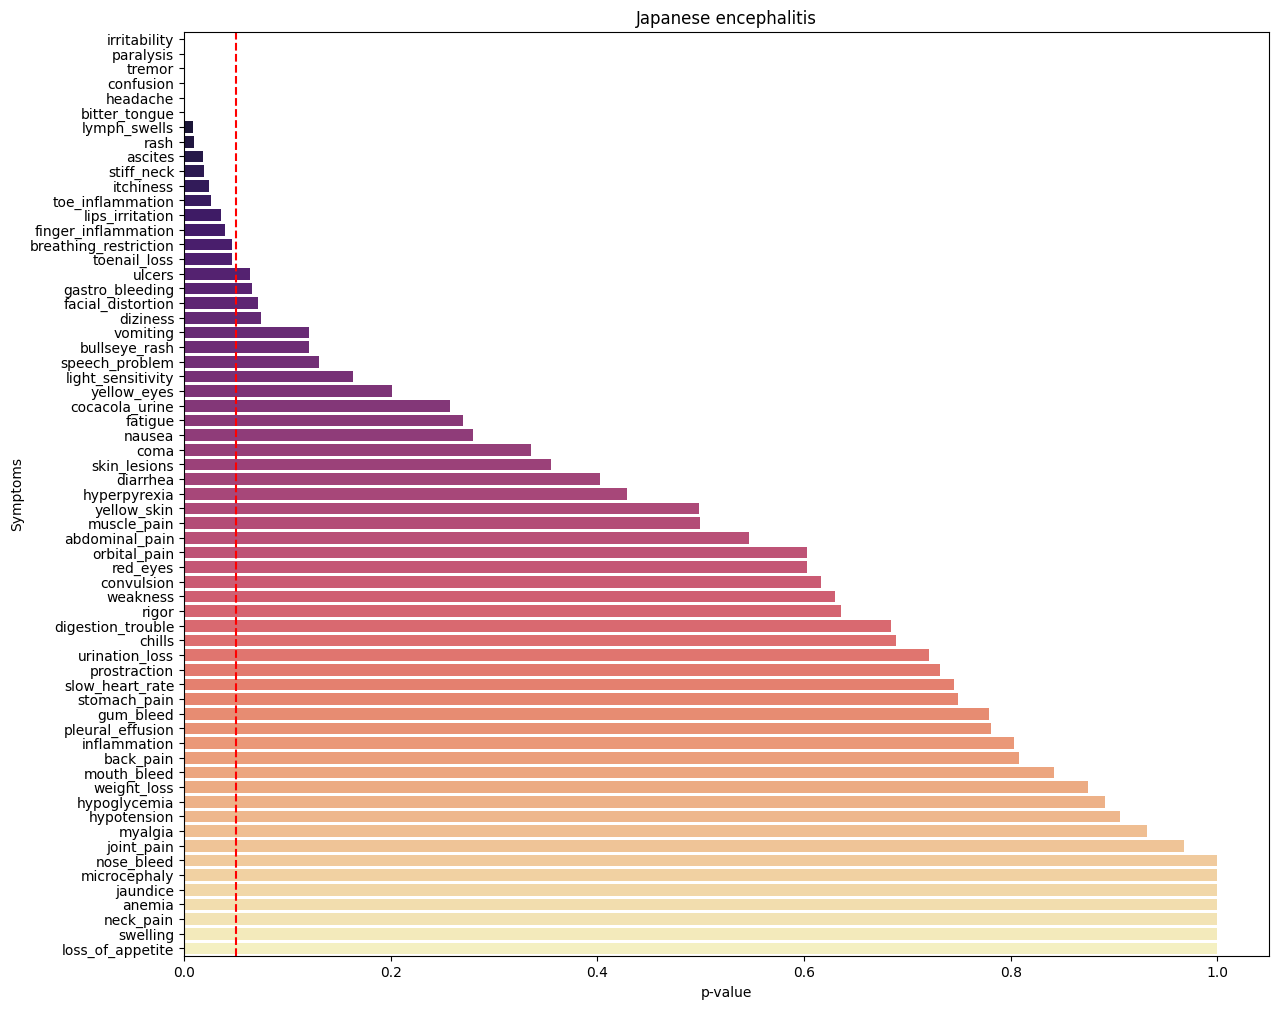

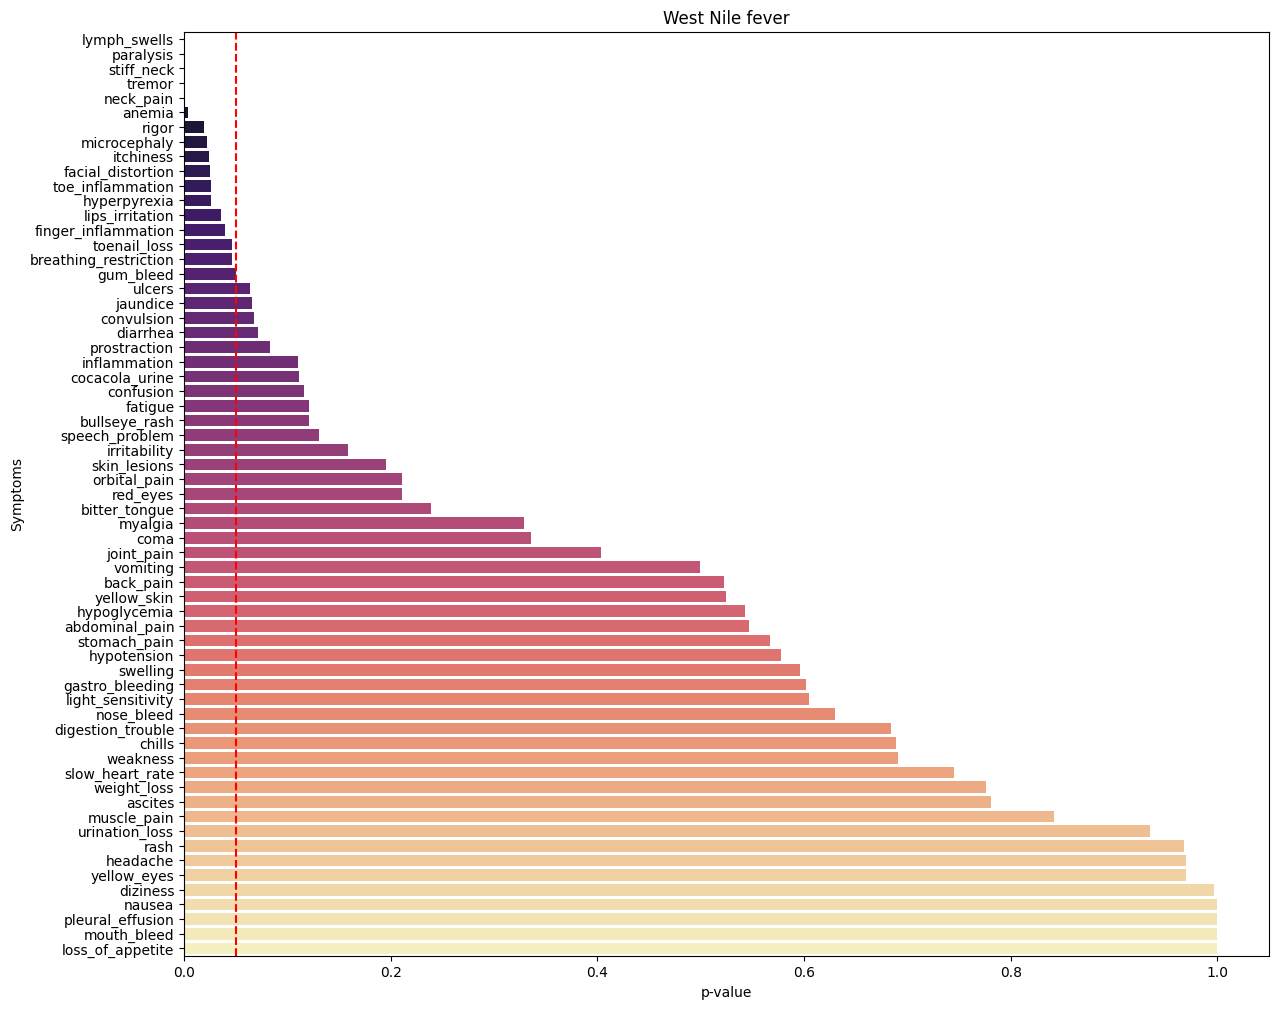

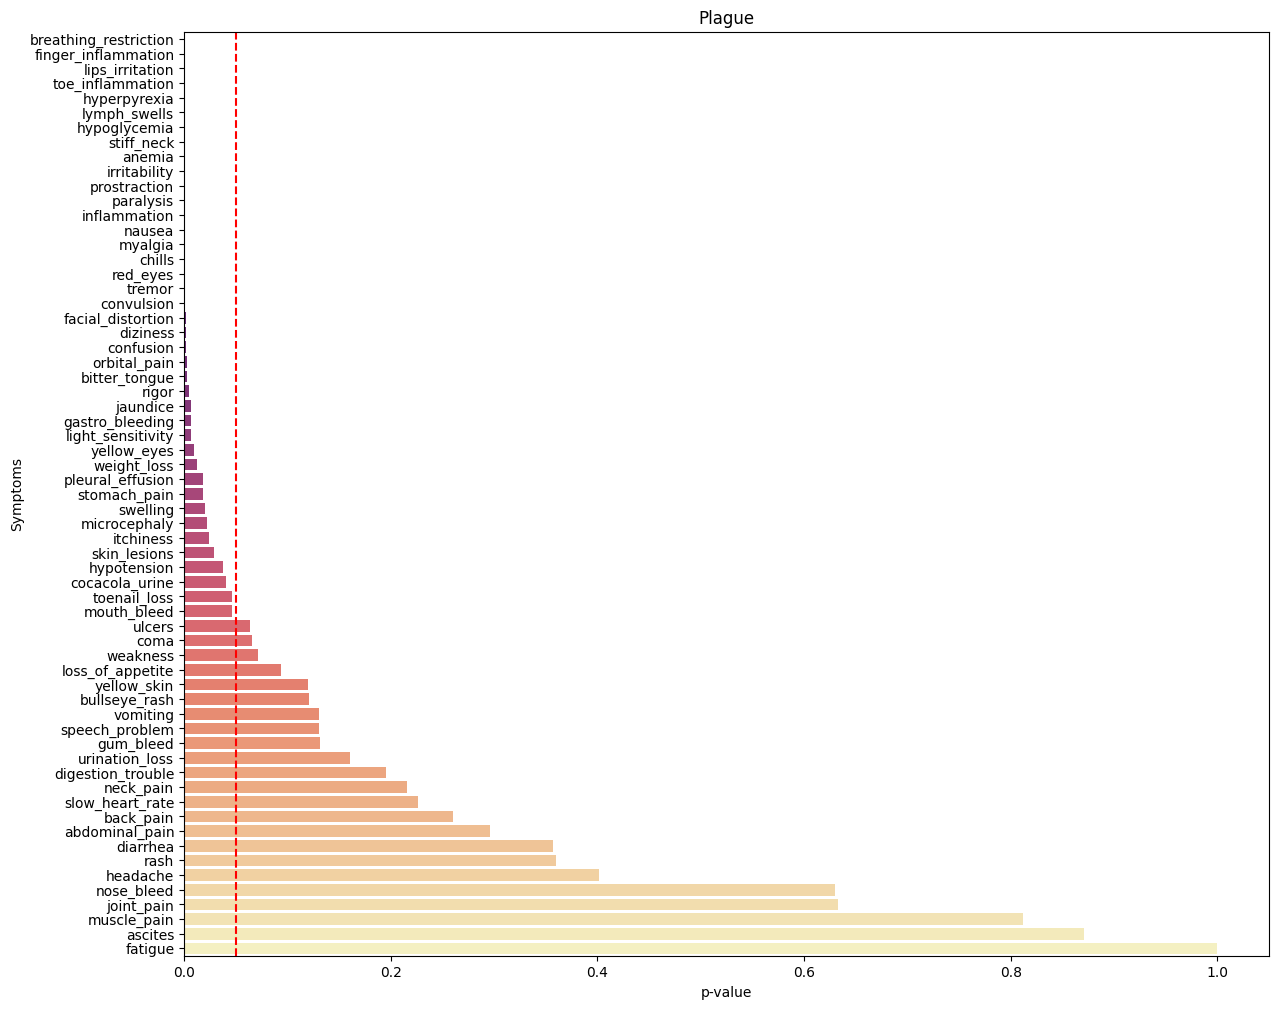

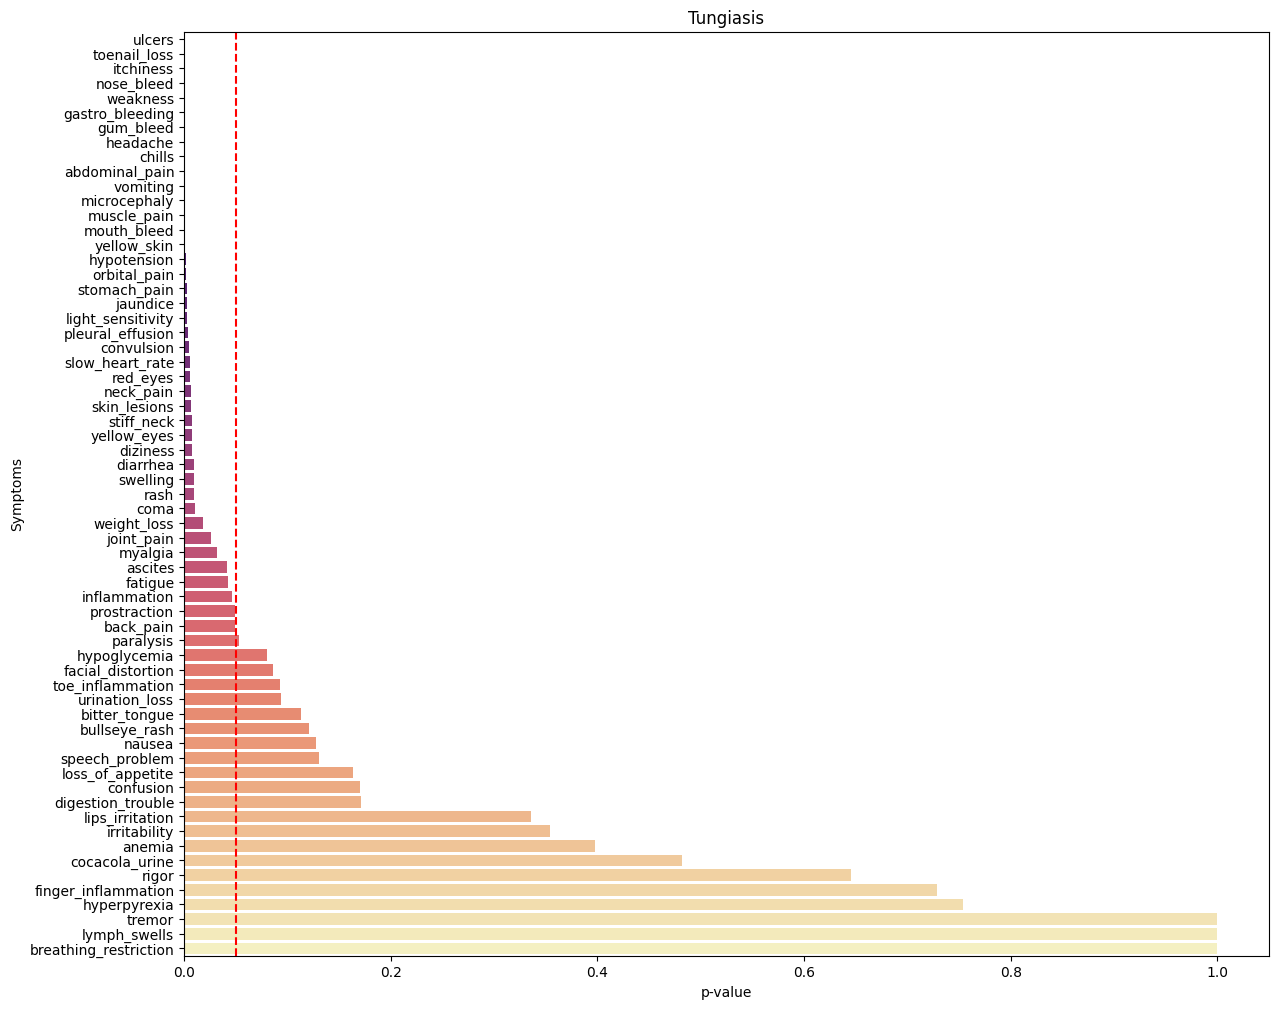

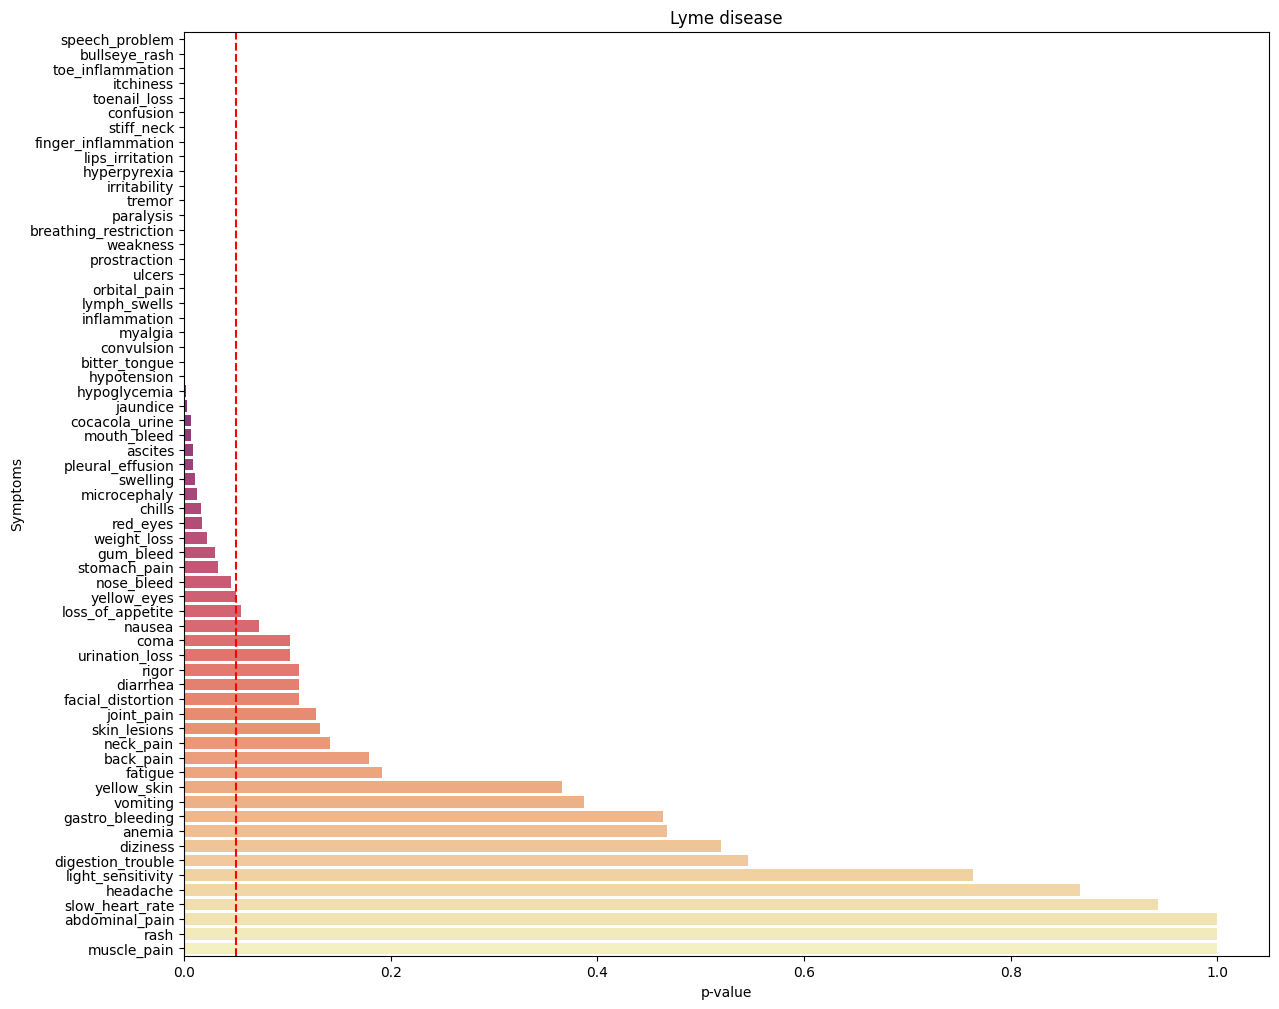

In [3]:
# Get all unique prognoses
unique_prognoses = dataset['prognosis'].unique()

# Loop through each prognosis
for selected_prognosis in unique_prognoses:
    chi_square_results = {}
    for symptom in symptom_columns:
        # Create contingency table for each symptom against the current prognosis
        contingency_table = pd.crosstab(dataset[symptom], dataset['prognosis'] == selected_prognosis)
        chi2, p, _, _ = chi2_contingency(contingency_table)
        chi_square_results[symptom] = p

    # Convert results to DataFrame and sort by p-value
    chi_square_results_df = pd.DataFrame.from_dict(chi_square_results, orient='index', columns=['p-value']).sort_values(by='p-value')

    # Plot Chi-Square p-values for the current prognosis
    plt.figure(figsize=(14, 12))
    sns.barplot(x='p-value', y=chi_square_results_df.index, data=chi_square_results_df, palette="magma")
    plt.axvline(0.05, color='red', linestyle='--')  # Significance level line
    #plt.title(f'Chi-Square Test p-values for Symptoms with Prognosis: {selected_prognosis}')
    plt.title(f'{selected_prognosis}')
    plt.xlabel('p-value')
    plt.ylabel('Symptoms')
    plt.show()

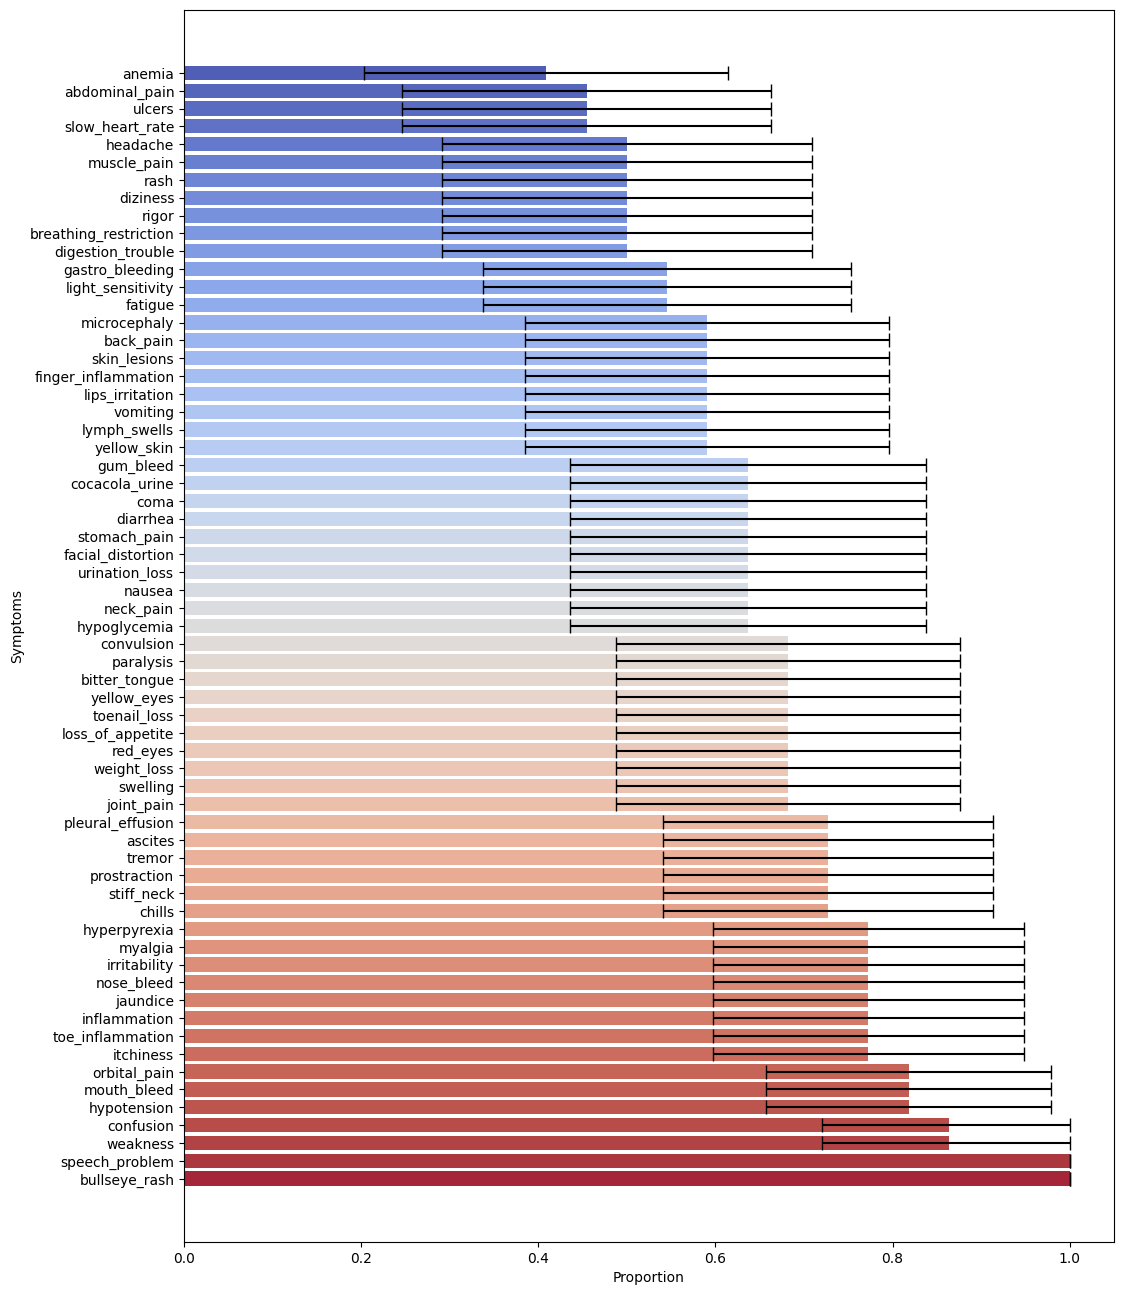

In [4]:
# Calculate Confidence Intervals for Symptoms Proportion
confidence_intervals = {}
n = len(prognosis_data)
for symptom in symptom_columns:
    count = prognosis_data[symptom].sum()
    lower, upper = proportion_confint(count, n, alpha=0.05, method='normal')
    confidence_intervals[symptom] = (count/n, lower, upper)

# Convert to DataFrame
confidence_intervals_df = pd.DataFrame.from_dict(confidence_intervals, orient='index', columns=['Proportion', 'Lower CI', 'Upper CI']).sort_values(by='Proportion')

# Plot Confidence Intervals
plt.figure(figsize=(12, 16))
sns.barplot(x='Proportion', y=confidence_intervals_df.index, data=confidence_intervals_df, palette="coolwarm")
plt.errorbar(confidence_intervals_df['Proportion'], confidence_intervals_df.index, 
             xerr=[confidence_intervals_df['Proportion'] - confidence_intervals_df['Lower CI'], 
                   confidence_intervals_df['Upper CI'] - confidence_intervals_df['Proportion']],
             fmt='none', c='black', capsize=5)
#plt.title('Confidence Intervals for Symptom Proportions')
plt.xlabel('Proportion')
plt.ylabel('Symptoms')
plt.show()


In [5]:
# Logistic Regression
X = dataset[symptom_columns]
y = (dataset['prognosis'] == selected_prognosis).astype(int)
logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()

# Extract coefficients
coefficients = result.params[1:]  # Exclude the intercept
coefficients_df = pd.DataFrame(coefficients, columns=['Coefficient']).sort_values(by='Coefficient')

# Plot Logistic Regression Coefficients
plt.figure(figsize=(14,14))
sns.barplot(x='Coefficient', y=coefficients_df.index, data=coefficients_df, palette="crest")
plt.title('Logistic Regression Coefficients for Symptoms')
plt.xlabel('Coefficient')
plt.ylabel('Symptoms')
plt.show()


/Users/rakibul/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/rakibul/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

Optimization terminated successfully.
         Current function value: 0.297850
         Iterations 7


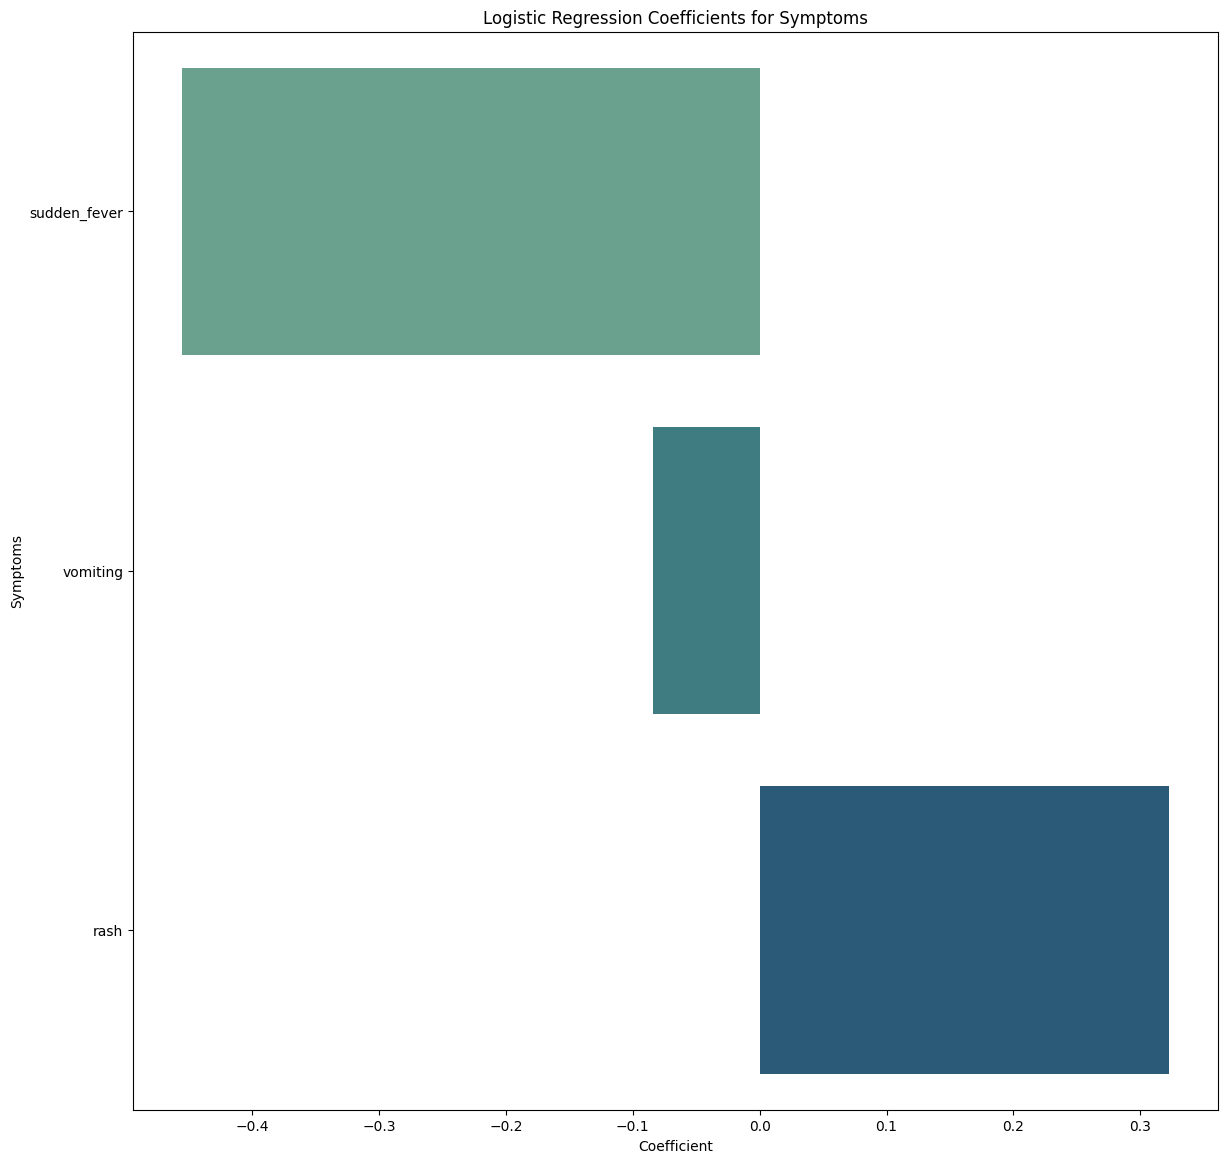

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataset' is your DataFrame and 'symptom_columns' is a list of symptom column names
# 'selected_prognosis' should be the prognosis you are interested in
symptom_columns = ['sudden_fever', 'rash', 'vomiting']  # example symptom columns
selected_prognosis = 'Dengue'  # example prognosis

# Prepare the data
X = dataset[symptom_columns]
y = (dataset['prognosis'] == selected_prognosis).astype(int)

# Fit the Logistic Regression model
logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()

# Extract and sort coefficients
coefficients = result.params[1:]  # Exclude the intercept
coefficients_df = pd.DataFrame(coefficients, columns=['Coefficient']).sort_values(by='Coefficient')

# Plot Logistic Regression Coefficients
plt.figure(figsize=(14, 14))
sns.barplot(x='Coefficient', y=coefficients_df.index, data=coefficients_df, palette="crest")
plt.title('Logistic Regression Coefficients for Symptoms')
plt.xlabel('Coefficient')
plt.ylabel('Symptoms')
plt.show()


Optimization terminated successfully.
         Current function value: 0.182311
         Iterations 10


/var/folders/tk/7b7jqg510qs87gwrz4s9v7m80000gn/T/ipykernel_3113/548540832.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Coefficient', y=coefficients_df.index, data=coefficients_df, palette="crest", ci=None)


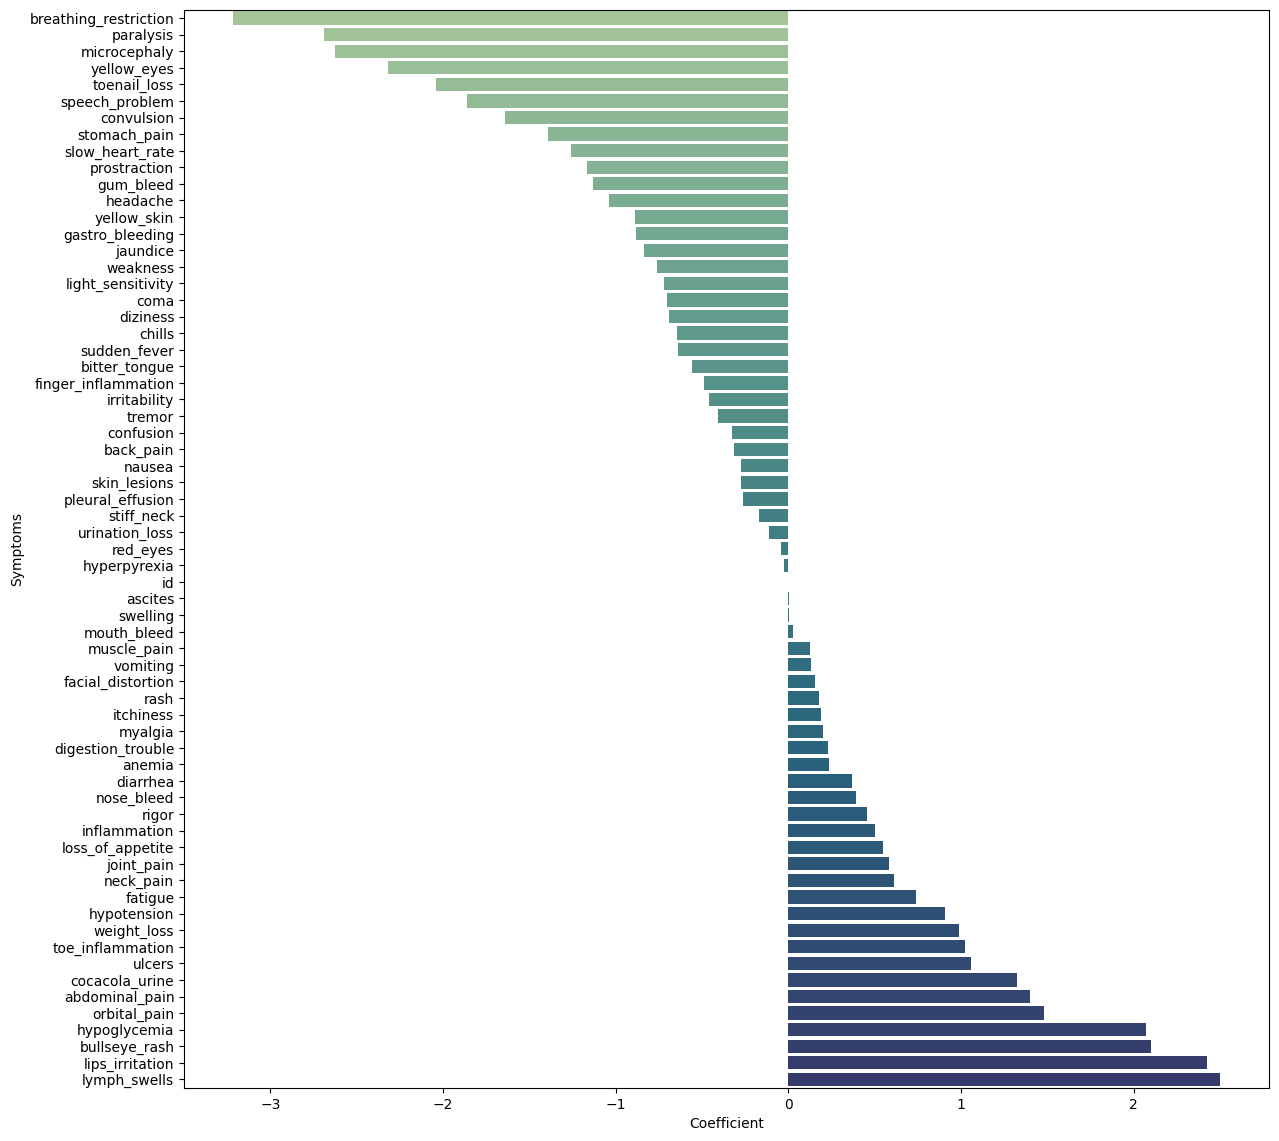

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'dataset' is your DataFrame and 'symptom_columns' is a list of all symptom column names
# 'selected_prognosis' should be the prognosis you are interested in
symptom_columns = dataset.columns.drop('prognosis')  # Assuming 'Prognosis' is the column name for outcomes
selected_prognosis = 'Dengue'  # example prognosis

# Prepare the data
X = dataset[symptom_columns]
y = (dataset['prognosis'] == selected_prognosis).astype(int)

# Fit the Logistic Regression model
logit_model = sm.Logit(y, sm.add_constant(X))
result = logit_model.fit()

# Extract coefficients and confidence intervals
coefficients = result.params[1:]  # Exclude the intercept
conf = result.conf_int().iloc[1:]  # Exclude the intercept
conf['Coefficient'] = coefficients

# Sort the coefficients
coefficients_df = conf.sort_values(by='Coefficient')
coefficients_df.columns = ['2.5%', '97.5%', 'Coefficient']

# Plot Logistic Regression Coefficients with Confidence Intervals
plt.figure(figsize=(14, 14))
sns.barplot(x='Coefficient', y=coefficients_df.index, data=coefficients_df, palette="crest", ci=None)
#plt.title('Logistic Regression Coefficients for Symptoms')
plt.xlabel('Coefficient')
plt.ylabel('Symptoms')
plt.show()
